In [1]:
from google.colab import files
uploaded = files.upload()

Saving heartfailure.csv to heartfailure.csv


In [5]:
heart=pd.read_csv('heartfailure.csv')
print(heart)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [11]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
for column in heart.columns:
    print(f"Sütun: {column}")
    print(heart[column].unique())
    print()

Sütun: Age
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]

Sütun: Sex
['M' 'F']

Sütun: ChestPainType
['ATA' 'NAP' 'ASY' 'TA']

Sütun: RestingBP
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]

Sütun: Cholesterol
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 

In [8]:
print(heart.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [9]:
X=heart.drop(columns=['HeartDisease'])
Y=heart['HeartDisease']

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [18]:
from sklearn.preprocessing import LabelEncoder

# Assuming X is your dataframe with categorical features
for column in X.select_dtypes(include=['object']).columns:
    # Create a LabelEncoder for each categorical column
    le = LabelEncoder()

    # Fit and transform the column in both train and test sets
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])

In [60]:
tree_clf=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)

In [61]:
tree_clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [62]:
y_pred=tree_clf.predict(X_test)

In [63]:
acc=accuracy_score(Y_test,y_pred)
print("Modelin Doğruluğu:",acc)

Modelin Doğruluğu: 0.8206521739130435


In [64]:
conf_mat=confusion_matrix(Y_test,y_pred)
print("Confusion Matrix:\n",conf_mat)

Confusion Matrix:
 [[62 15]
 [18 89]]


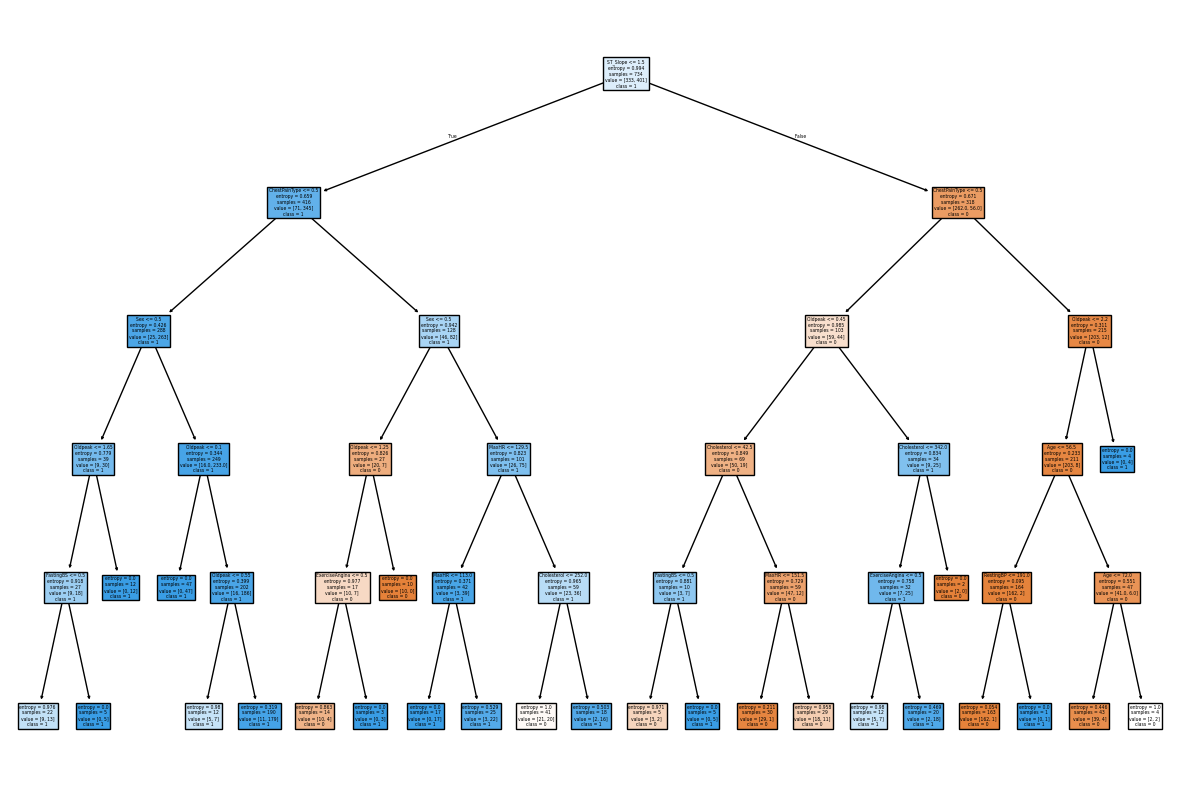

In [65]:
#featre_names ve class_name'de veri tipinin liste olması istenir.
plt.figure(figsize=(15,10))
plot_tree(tree_clf, filled=True,
          feature_names=X.columns.tolist(),
          class_names=[str(c) for c in heart.HeartDisease])
plt.show()

In [73]:
feature_importance=tree_clf.feature_importances_
print(feature_importance)

[0.02201593 0.046404   0.16312918 0.01451573 0.03791927 0.01554922
 0.         0.04667568 0.01633205 0.12124469 0.51621425]


In [70]:
feature_names=X.columns
print(feature_names)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')


In [78]:
feature_importance_sorted=sorted(zip(feature_importance,feature_names),reverse=True)

In [80]:
for importance, feature_name in feature_importance_sorted: # Corrected the iterable to 'feature_importance_sorted'
  print(f"{feature_name}:{importance}")

ST_Slope:0.5162142463750902
ChestPainType:0.163129176917874
Oldpeak:0.12124468906191431
MaxHR:0.04667567818960645
Sex:0.046404003654861935
Cholesterol:0.03791926908036949
Age:0.022015928176981298
ExerciseAngina:0.0163320549356048
FastingBS:0.015549221776861797
RestingBP:0.014515731830835757
RestingECG:0.0
